<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/healthnutrition__relation_insight_%EC%9E%84%EC%A7%80%EC%9A%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [35]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


#데이터 가져오기

In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(120), object(2)
memory usage: 33.2+ MB


ID            0
ID_fam        0
year          0
region        0
town_t        0
             ..
협심증또는심근경색증    0
천식            0
아토피피부염        0
골관절염          0
우울증           0
Length: 122, dtype: int64

In [6]:
df.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

# 변수정리

In [ ]:
# #EC 직업과 관련된 문항
# job_check = df['EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2']
# #BD 음주와 흡연과 관련된 
# drunk_check = df['BD1_11','BD2_1','BD2_31','dr_month','BS3_1']
# #BP 정신적 스트레스와 관련된 문항
# mental_stress = df['BP6_10','BP7','mh_stress']
# #BE 신체적 활동(운동)과 관련된 문항
# exercise = df['BE3_31','BE5_1']
# #LW 출산 여부와 관련된 문항
# childbirth_check = df['LW_mt','LW_mt_a1','LW_br']
# # # 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 
# # # incm과 관련된문항 소득분위
# # income_check = 
# # # HE와 관련된문항  #건강검진부분
# # phisical_check = 
# # #N과관련된 문항 #1일 영양소섭취와 관련된문항
# # nutrient_intake = 
# # #EC와 경제수준과 관련된문항


#질병 : 
'비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증'

#년도 변화에 따른 신체/질병 특성의 변화

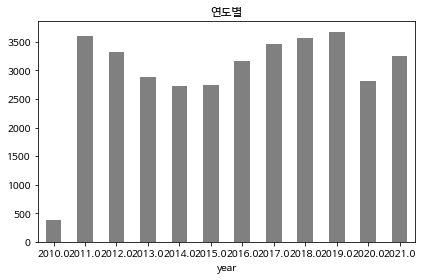

In [36]:
s = df.groupby('year').size()

s.plot(color='grey', kind='bar', rot=0)
plt.title("연도별")
plt.tight_layout()

가장 많은 연도: 2019, 2011    
가장 적은 연도: 2014, 2015

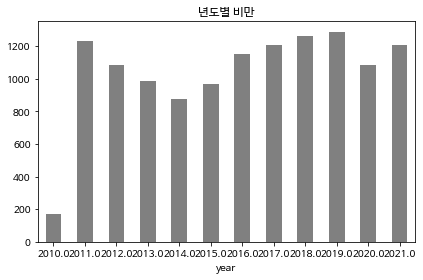

In [37]:
fat = df[df['비만']==1].groupby('year')['비만'].size()

fat.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 비만")
plt.tight_layout()

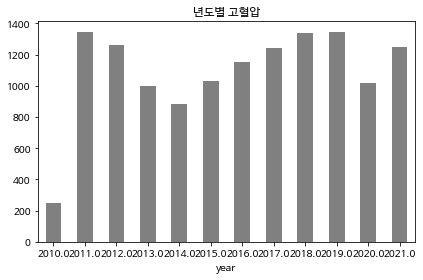

In [40]:
hypt = df[df['고혈압']==1].groupby('year')['고혈압'].size()

hypt.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 고혈압")
plt.tight_layout()

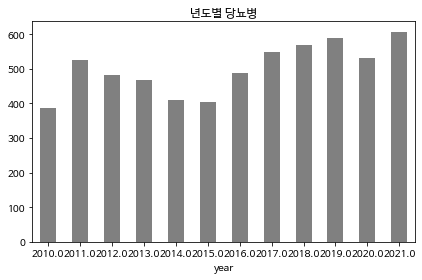

In [41]:
dbt = df[df['당뇨병']==1].groupby('year')['당뇨병'].size()

dbt.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 당뇨병")
plt.tight_layout()

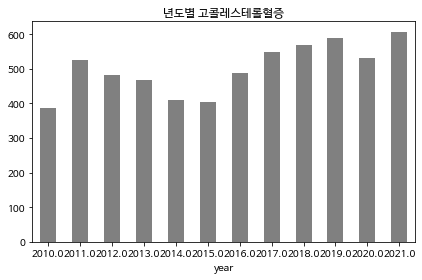

In [42]:
hycl = df[df['고콜레스테롤혈증']==1].groupby('year')['고콜레스테롤혈증'].size()

dbt.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 고콜레스테롤혈증")
plt.tight_layout()

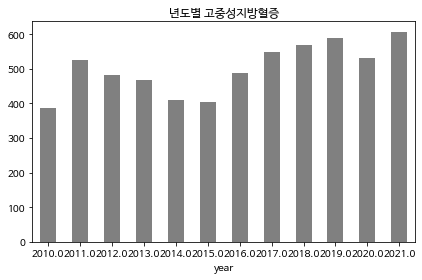

In [43]:
hyfat = df[df['고중성지방혈증']==1].groupby('year')['고중성지방혈증'].size()

dbt.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 고중성지방혈증")
plt.tight_layout()

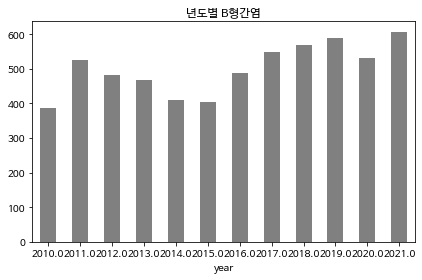

In [44]:
Btype = df[df['B형간염']==1].groupby('year')['B형간염'].size()

dbt.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 B형간염")
plt.tight_layout()

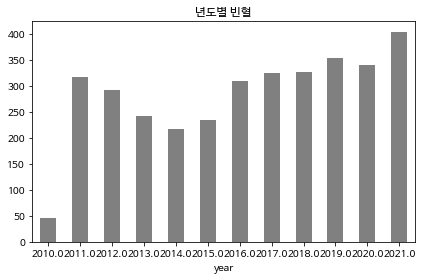

In [45]:
am = df[df['빈혈']==1].groupby('year')['빈혈'].size()

am.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 빈혈")
plt.tight_layout()

빈혈은 2021년에 가장 높았고, 2014년에 가장 낮았음

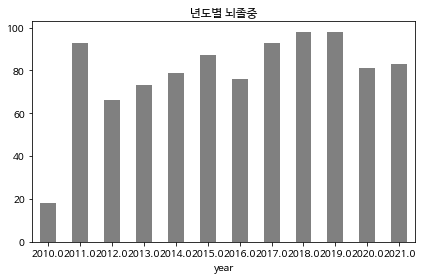

In [46]:
st = df[df['뇌졸중']==1].groupby('year')['뇌졸중'].size()

st.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 뇌졸중")
plt.tight_layout()

뇌졸중 2012년부터 급격하게 줄었지만 점차 다시 늘어났음       
뇌졸중은 대체로 높은 편임

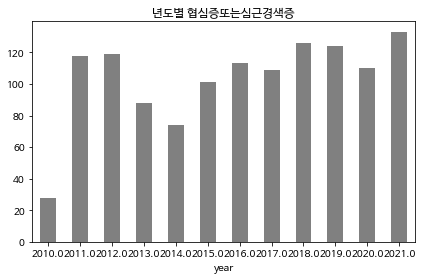

In [47]:
myin = df[df['협심증또는심근경색증']==1].groupby('year')['협심증또는심근경색증'].size()

myin.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 협심증또는심근경색증")
plt.tight_layout()

보통 수치들은 2011년에 높은 편인데 **협심증또는심근경색증** 부분은 낮은 편임         
협심증또는심근경색증 2014년이 가장 낮음

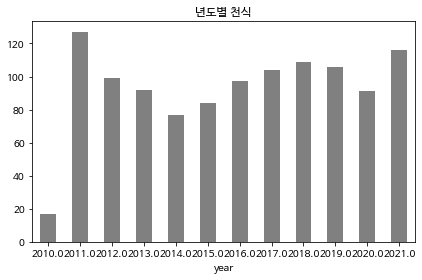

In [48]:
asth = df[df['천식']==1].groupby('year')['천식'].size()

asth.plot(color='grey', kind='bar', rot=0)
plt.title("년도별 천식")
plt.tight_layout()

천식은 2011년에 가장 높았음

In [51]:
asth = df[df['아토피피부염']==1].groupby('year')['아토피피부염'].size()
oste = df[df['골관절염']==1].groupby('year')['골관절염'].size()
depression = df[df['우울증']==1].groupby('year')['우울증'].size()

def bar_plot(feature):
  feature.plot(color='grey', kind='bar', rot=0)
  plt.tight_layout()

Text(0.5, 1.0, '년도별 아토피피부염')

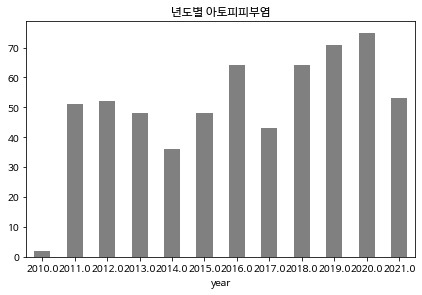

In [52]:
bar_plot(asth)
plt.title('년도별 아토피피부염')

아토피피부염 2016년, 2018년에 높았고
2018년-2020년에 차츰 높아졌다.

Text(0.5, 1.0, '년도별 골관절염')

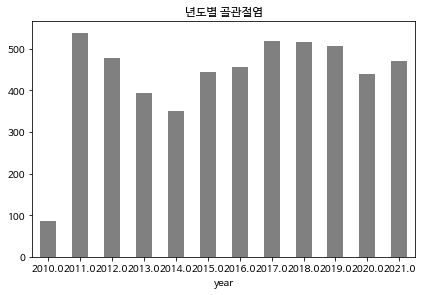

In [53]:
bar_plot(oste)
plt.title('년도별 골관절염')

Text(0.5, 1.0, '년도별 우울증')

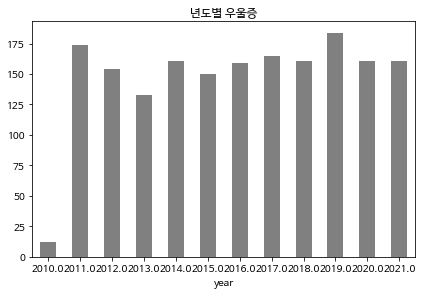

In [54]:
bar_plot(depression)
plt.title('년도별 우울증')

우울증이 갑자기 높은 해: (2011), 2014, **2019**

2010년 데이터 제외

Text(0.5, 1.0, '년도별 스트레스인지율')

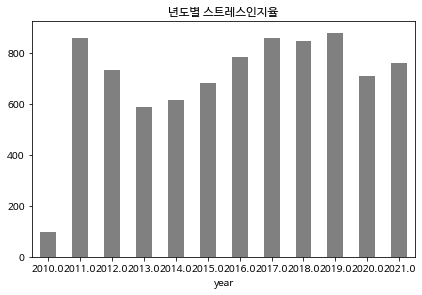

In [55]:
stress = df[df['mh_stress']==1].groupby('year')['mh_stress'].size()

bar_plot(stress)
plt.title("년도별 스트레스인지율")

#지역별 질병/신체 특징

1 : 서울 | 2 : 부산 | 3 : 대구 | 4 : 인천 | 5 : 광주 | 6 : 대전 | 7 : 울산 | 8 : 세종 | 9 : 경기 | 10 : 강원 | 11 : 충북 | 12 : 충남 | 13 : 전북 | 14 : 전남 | 15 : 경북 | 16 : 경남 | 17 : 제주 |

In [78]:
df.loc[df['region'] == 1, 'region'] = '서울'
df.loc[df['region'] == 2, 'region'] = '부산'
df.loc[df['region'] == 3, 'region'] = '대구'
df.loc[df['region'] == 4, 'region'] = '인천'
df.loc[df['region'] == 5, 'region'] = '광주'
df.loc[df['region'] == 6, 'region'] = '대전'
df.loc[df['region'] == 7, 'region'] = '울산'
df.loc[df['region'] == 8, 'region'] = '세종'
df.loc[df['region'] == 9, 'region'] = '경기'
df.loc[df['region'] == 10, 'region'] = '강원'
df.loc[df['region'] == 11, 'region'] = '충북'
df.loc[df['region'] == 12, 'region'] = '충남'
df.loc[df['region'] == 13, 'region'] = '전북'
df.loc[df['region'] == 14, 'region'] = '전남'
df.loc[df['region'] == 15, 'region'] = '경북'
df.loc[df['region'] == 16, 'region'] = '경남'
df.loc[df['region'] == 17, 'region'] = '제주'

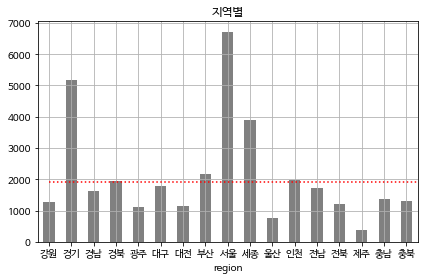

In [79]:
region = df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

환자 수가 많은 지역: 서울>경기>세종>부산>인천

서울 : 무직 > 관리자 > 사무직 > 서비스업 

In [82]:
fat_r = df[df['비만']==1].groupby('region')['비만'].size()
hypt_r = df[df['고혈압']==1].groupby('region')['고혈압'].size()
dia_r = df[df['당뇨병']==1].groupby('region')['당뇨병'].size()
hycl_r = df[df['고콜레스테롤혈증']==1].groupby('region')['고콜레스테롤혈증'].size()
hyft_r = df[df['고중성지방혈증']==1].groupby('region')['고중성지방혈증'].size()
Bt_r = df[df['B형간염']==1].groupby('region')['B형간염'].size()
anem_r = df[df['빈혈']==1].groupby('region')['빈혈'].size()
stroke_r = df[df['뇌졸중']==1].groupby('region')['뇌졸중'].size()
myin_r = df[df['협심증또는심근경색증']==1].groupby('region')['협심증또는심근경색증'].size()
asth_r = df[df['천식']==1].groupby('region')['천식'].size()
ato_r = df[df['아토피피부염']==1].groupby('region')['아토피피부염'].size()
oste_r = df[df['골관절염']==1].groupby('region')['골관절염'].size()
depression_r = df[df['우울증']==1].groupby('region')['우울증'].size()

In [83]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 
#disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']


def bar_plot(feature):
  feature.plot(color='grey', kind='bar', rot=0)
  plt.tight_layout()

Text(0.5, 1.0, '지역별 비만')

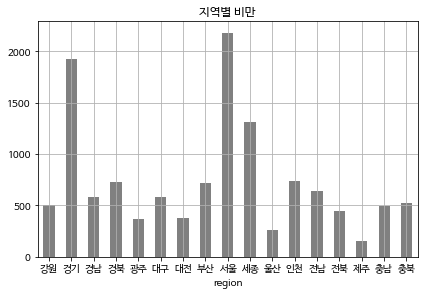

In [84]:
bar_plot(fat_r)
plt.title("지역별 비만")

인천, 부산, 경북

Text(0.5, 1.0, '지역별 고혈압')

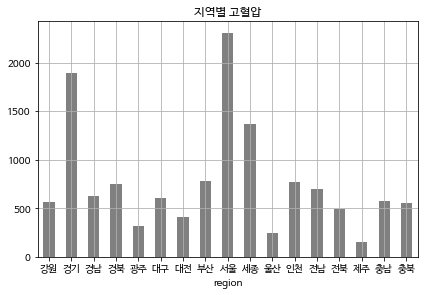

In [85]:
bar_plot(hypt_r)
plt.title("지역별 고혈압")

Text(0.5, 1.0, '지역별 당뇨병')

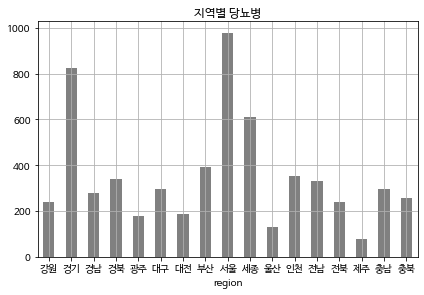

In [86]:
bar_plot(dia_r)
plt.title('지역별 당뇨병')

Text(0.5, 1.0, '지역별 고콜레스테롤혈증')

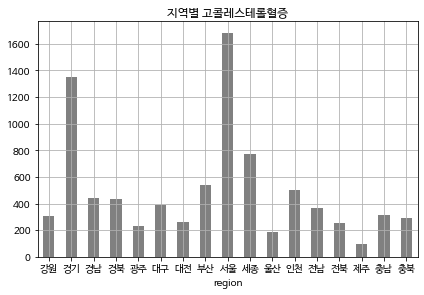

In [87]:
bar_plot(hycl_r)
plt.title('지역별 고콜레스테롤혈증')

Text(0.5, 1.0, '지역별 고중성지방혈증')

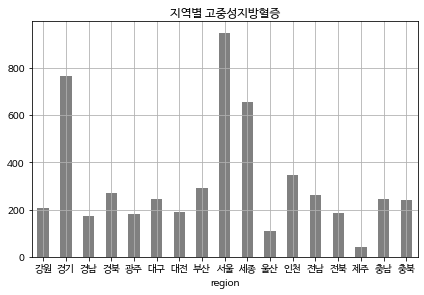

In [88]:
bar_plot(hyft_r)
plt.title('지역별 고중성지방혈증')

서울> 경기> 세종 다음으로 인천, 전남, 부산, 경북 등이 높게 나옴

Text(0.5, 1.0, '지역별 B형간염')

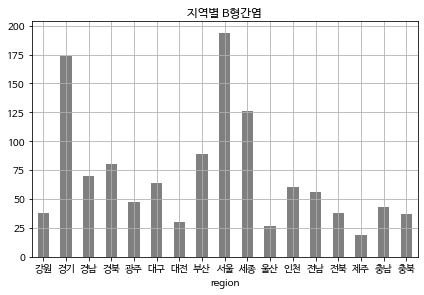

In [89]:
bar_plot(Bt_r)
plt.title('지역별 B형간염')

부산, 경남, 경북, 대구, 인천 정도가 높은 편임

Text(0.5, 1.0, '지역별 빈혈')

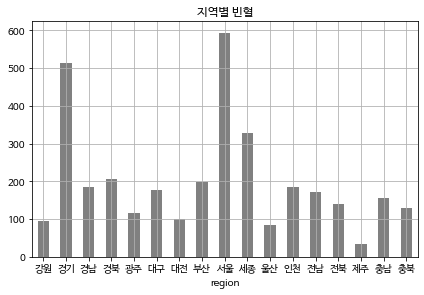

In [90]:
bar_plot(anem_r) 
plt.title('지역별 빈혈')

경남, 경북, 대구, 부산, 인천, 전남 정도에서 빈혈 환자가 많은 편임

Text(0.5, 1.0, '지역별 뇌졸중')

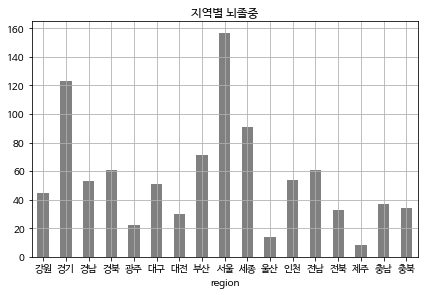

In [91]:
bar_plot(stroke_r)
plt.title('지역별 뇌졸중')

뇌졸중에 부산이 많이 높은 편       
경북, 경남, 전남, 인천, 대구도 높은 편임.(노인의 수가 많은 것도 요인일 것 같음.)           

Text(0.5, 1.0, '협심증또는심근경색증')

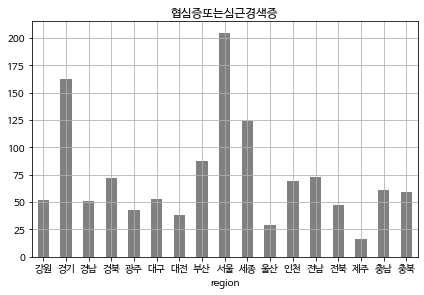

In [92]:
bar_plot(myin_r)
plt.title('협심증또는심근경색증')

부산, 경북, 전남, 인천이 높은 편이고       
울산, 제주는 낮은 편임.

Text(0.5, 1.0, '지역별 천식')

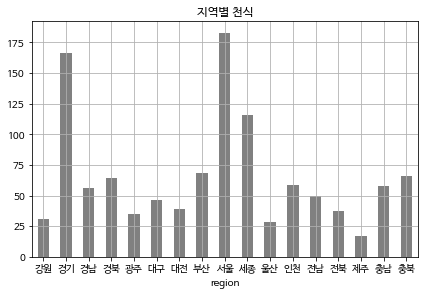

In [93]:
bar_plot(asth_r)
plt.title('지역별 천식')

천식은 경기도가 다른 질병들과 달리 매우 높은 편임.      
서울 > 경기> 세종        
부산, 경북, 경남, 충북, 충남, 인천 위주로 높은 편임            
제주가 가장 낮음

Text(0.5, 1.0, '아토피피부염')

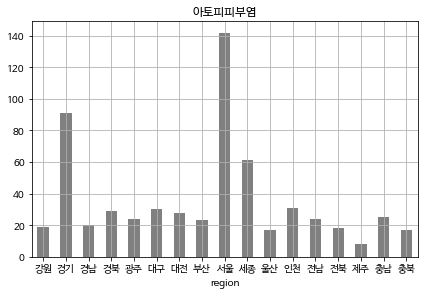

In [94]:
bar_plot(ato_r)
plt.title('아토피피부염')

아토피피부염은 서울 > 세종> 경기 순으로 높고 인천, 대구, 경북, 대전, 충남 정도가 높은 편임

Text(0.5, 1.0, '지역별 골관절염')

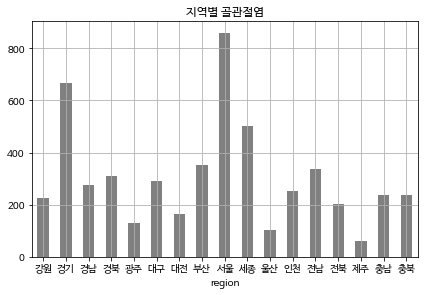

In [95]:
bar_plot(oste_r) 
plt.title('지역별 골관절염')

골관절염 높은 지역: 서울> 경기> 세종> 부산> 경북=전남 (농촌지역)        
골관절염 낮은 지역: 제주> 울산> 광주

Text(0.5, 1.0, '지역별 우울증')

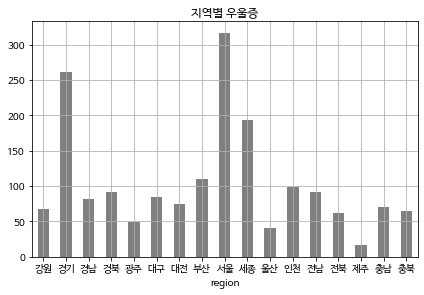

In [96]:
bar_plot(depression_r)
plt.title('지역별 우울증')

우울증이 낮은 지역: 제주> 울산> 광주

#나이에 따른 신체/질병 관련 특성'

연령: 30대부터 80대까지 

In [ ]:
print("나이 평균",df['age'].mean())
print("최소값",df['age'].min())
print("최대값",df['age'].max())

나이 평균 55.918353027028544
최소값 30.0
최대값 80.0


In [ ]:
df.loc[(df['age']<40)&(df['age']>=30), 'age']=1
df.loc[(df['age']<50)&(df['age']>=40), 'age']=2
df.loc[(df['age']<60)&(df['age']>=50), 'age']=3
df.loc[(df['age']<70)&(df['age']>=60), 'age']=4
df.loc[(df['age']<=80)&(df['age']>=70), 'age']=5

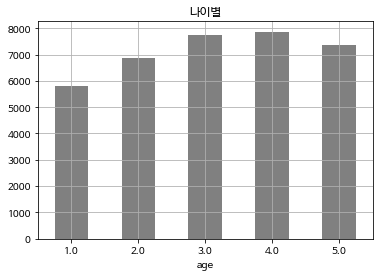

In [ ]:
age = df.groupby('age').size()

age.plot(color='grey', kind='bar', rot=0)
plt.title("나이별")
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    thirty = df[df['age']==1][feature].value_counts()
    fourty = df[df['age']==2][feature].value_counts()
    fifty = df[df['age']==3][feature].value_counts()
    sixty = df[df['age']==4][feature].value_counts()
    seventy = df[df['age']==5][feature].value_counts()
    data = pd.DataFrame([thirty, fourty, fifty, sixty, seventy])
    data.index = ['thirty', 'fourty', 'fifty', 'sixty', 'seventy']
    data.plot(kind='bar',stacked=True)

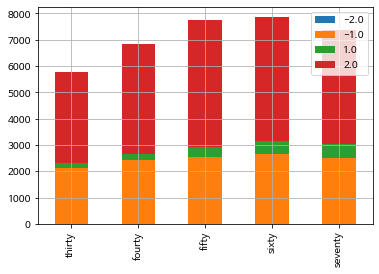

In [ ]:
bar_chart('BP6_10') #자살을 생각해 본 여부

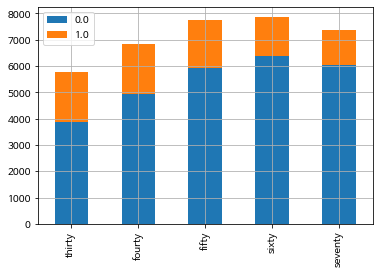

In [ ]:
bar_chart('mh_stress')

60대,50대 스트레스 인지율이 더 높지만 상대적으로 스트레스를 더 많이 받는 연령대는 30,40,50대입니다.

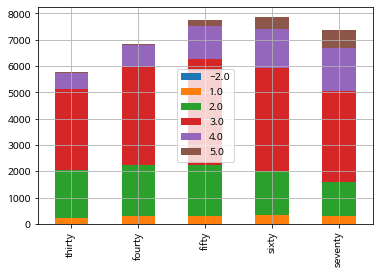

In [ ]:
bar_chart('D_1_1') #주관적 건강인지

60대 이후로 건강이 나쁘다고 인지한 비율이 높음       
50대부터 건강이 안좋다는 주관적 인지가 늘어나고 있음

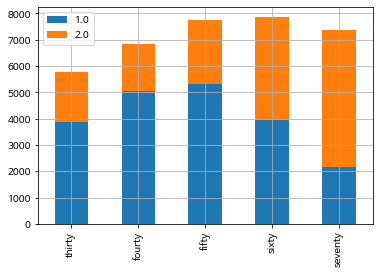

In [ ]:
bar_chart('EC1_1')

50대까지는 취업자 비율이 높음

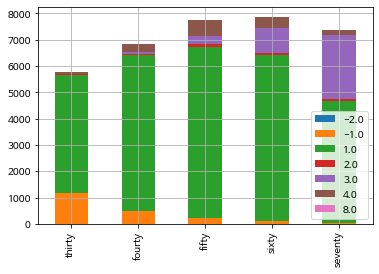

In [ ]:
bar_chart('marri_2') #결혼상태

70대부터 사별비율이 높아지면서 배우자 비율은 줄었음.

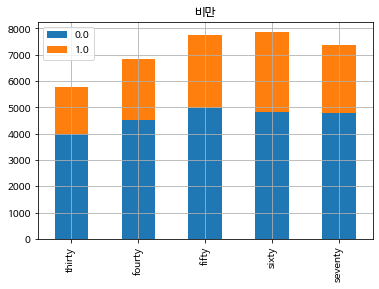

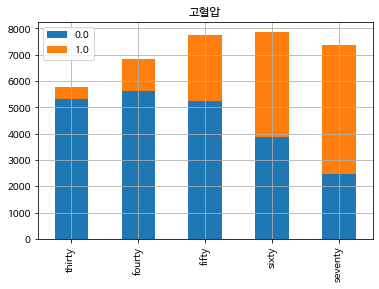

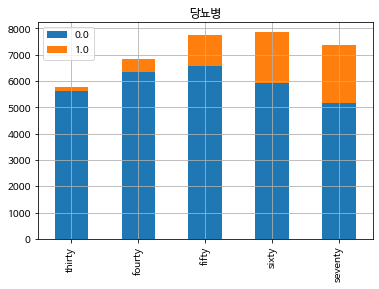

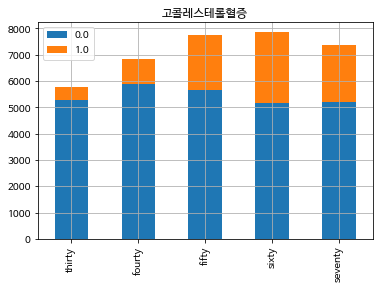

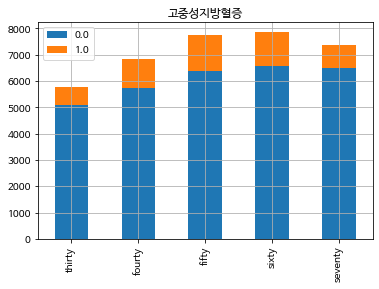

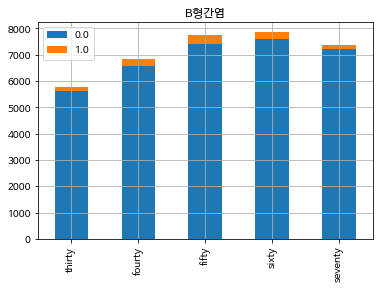

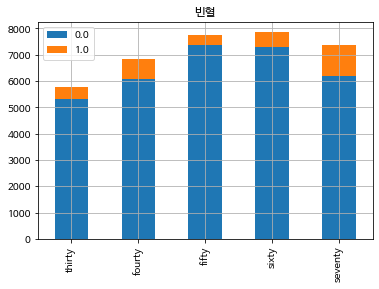

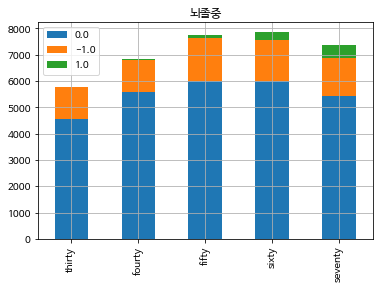

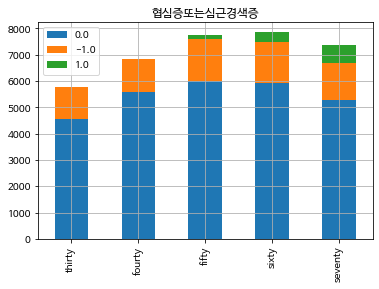

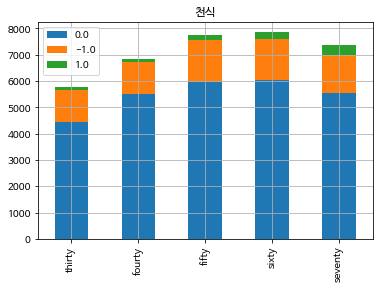

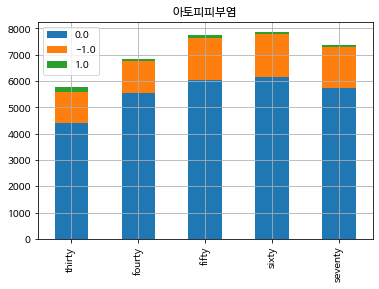

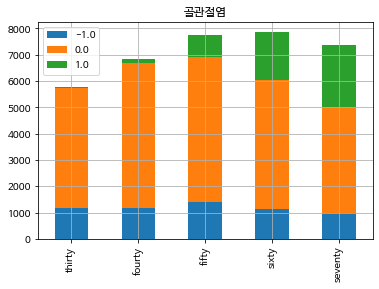

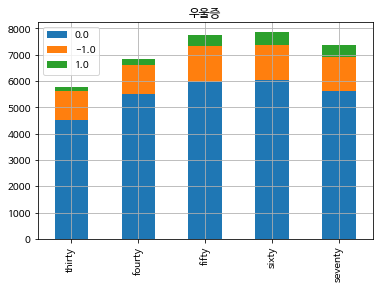

In [ ]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  bar_chart(disease[i])
  plt.title(disease[i])

비만: 60대가 1등       
당뇨병, 고혈압 : 70대 > 60대         
고콜레스테롤혈증: 60대> 70대 = 50대         
고지방혈증 : 50대 , 60대            
B형 간염은 비율이 무척 낮음         
빈혈: 70대 1등, 40대 2등  
뇌졸중 : 70대, 60대가 가장 높음         
협심증 및 심근경색증 : 60대, 70대가 가장 높음        
천식 :70대가 1등         
아토피피부염: 30대
골관절염: 70대 > 60대 > 50대       
우울증 : 50대, 60대, 70대 비슷하게 높음


#성별에 따른 신체/질병 관련 특성

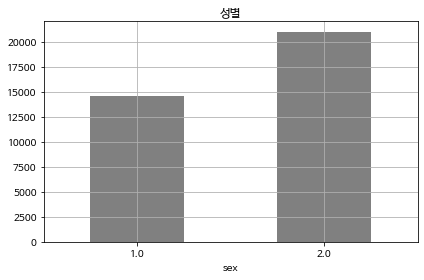

In [ ]:
sex = df.groupby('sex').size()

sex.plot(color='grey', kind='bar', rot=0)
plt.title("성별")
plt.tight_layout()

In [ ]:
men = df[df['sex']==1]['sex']
men.value_counts()

1.0    14620
Name: sex, dtype: int64

In [ ]:
men = df[df['sex']==1]['year']
men.value_counts()

2019.0    1527
2011.0    1465
2018.0    1458
2017.0    1451
2021.0    1352
2012.0    1337
2016.0    1258
2020.0    1171
2013.0    1166
2015.0    1131
2014.0    1098
2010.0     206
Name: year, dtype: int64

In [ ]:
women = df[df['sex']==2]['year']
women.value_counts()

2019.0    2149
2011.0    2146
2018.0    2107
2017.0    2014
2012.0    1994
2016.0    1910
2021.0    1909
2013.0    1714
2020.0    1644
2014.0    1624
2015.0    1615
2010.0     183
Name: year, dtype: int64

남성과 여성의 차이:
2021년에는 남성들의 발병률이 여성보다 높았음

In [ ]:
men.value_counts().index

Float64Index([2019.0, 2011.0, 2018.0, 2017.0, 2021.0, 2012.0, 2016.0, 2020.0,
              2013.0, 2015.0, 2014.0, 2010.0],
             dtype='float64')

In [ ]:
df.groupby('우울증').size()

우울증
-1.0     6162
 0.0    27692
 1.0     1775
dtype: int64

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    men = df[df['sex']==1][feature].value_counts()
    women = df[df['sex']==2][feature].value_counts()
    data = pd.DataFrame([men, women])
    data.index = ['men','women']
    data.plot(kind='bar',stacked=True)

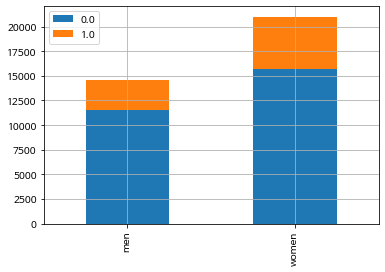

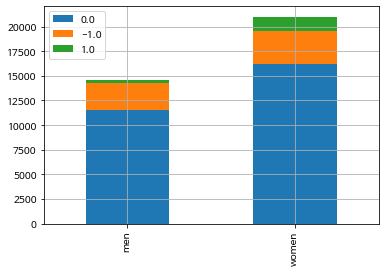

In [ ]:
bar_chart('mh_stress')
bar_chart('우울증')

여성이 남성보다 스트레스 인지율, 우울증이 더 높습니다.

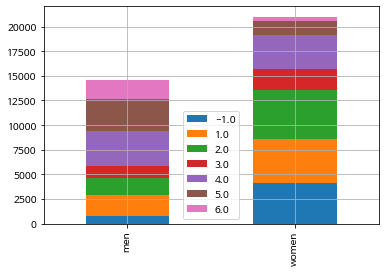

In [ ]:
bar_chart('BD1_11') #일년간 음주빈도

주 3,4회 이상 마시는 비율은 남성이 더 높습니다.

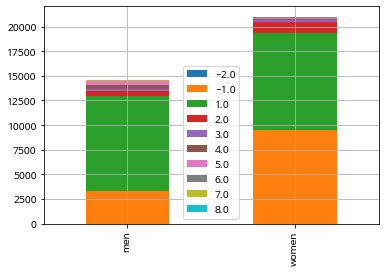

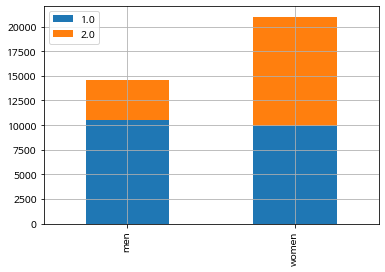

In [ ]:
bar_chart('EC_wht_5')
bar_chart('EC1_1')

비경제활동, 실업자인 여성이 더 많음

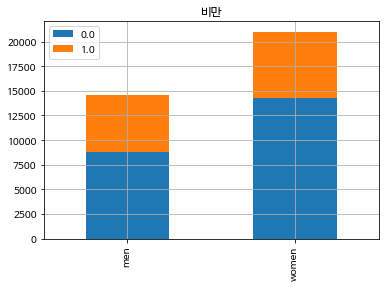

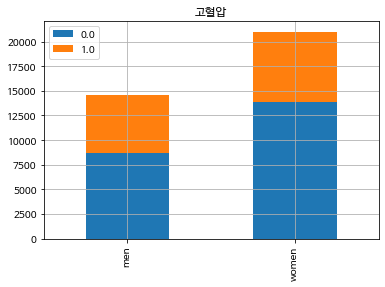

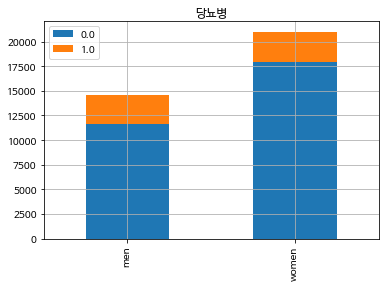

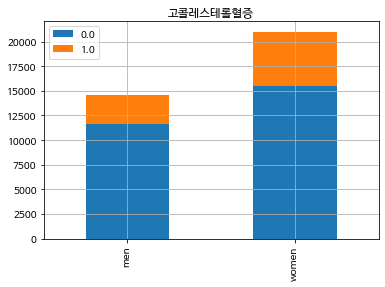

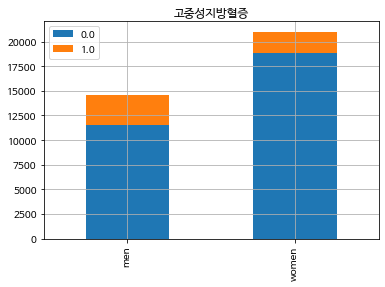

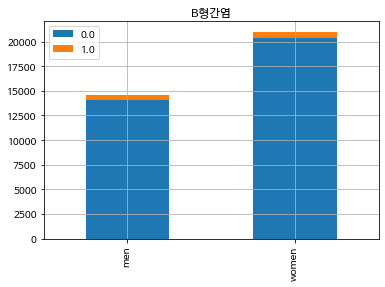

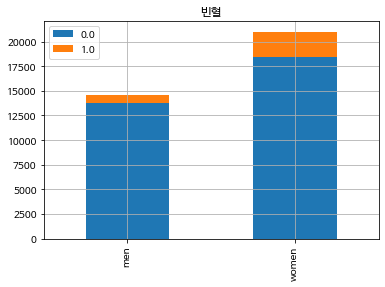

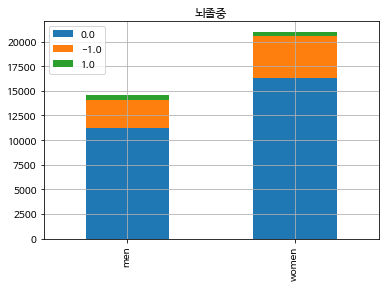

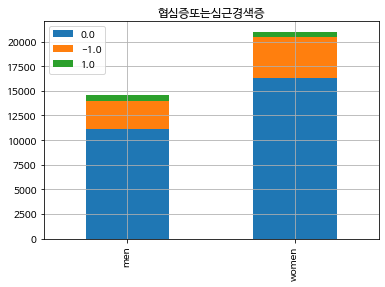

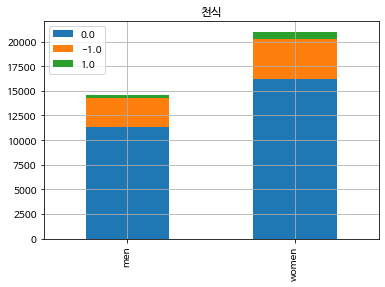

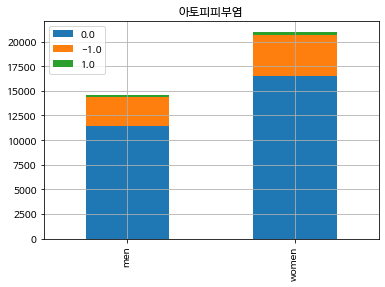

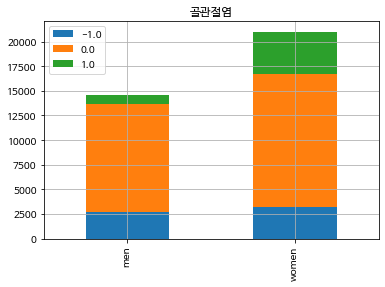

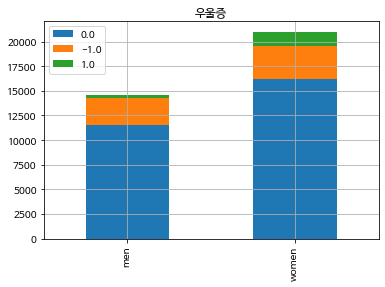

In [ ]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  bar_chart(disease[i])
  plt.title(disease[i])

남성이 고중성지방혈증이 높음.           
여성은 골관절염, 우울증 비중이 높음.

##고혈압이 가족력과 관련성 알아보기
hypertension :고혈압

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_HPfh1']==1][feature].value_counts()
    mom = df[df['HE_HPfh2']==1][feature].value_counts()
    bro = df[df['HE_HPfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)
    

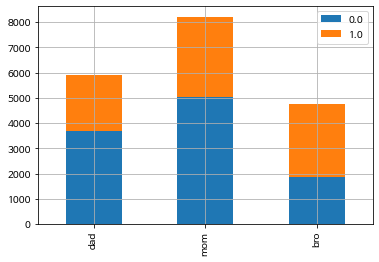

In [ ]:
bar_chart('고혈압')

고혈압 가족력은 어머니의 영향이 가장 크다.           
어머니 > 아버지 > 형재자매

##고지혈증이 가족력과 연관성 알아보기

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_HLfh1']==1][feature].value_counts()
    mom = df[df['HE_HLfh2']==1][feature].value_counts()
    bro = df[df['HE_HLfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

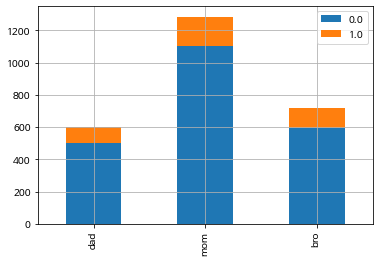

In [ ]:
bar_chart('고중성지방혈증')

어머니> 형재자매> 아버지

##허혈성 심장질환
허혈성 심질환은 혈액 공급에 장애를 일으키는 심장 질환을 말합니다.

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[(df['HE_IHDfh1']==1)][feature].value_counts()
    mom = df[df['HE_IHDfh2']==1][feature].value_counts()
    bro = df[df['HE_IHDfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

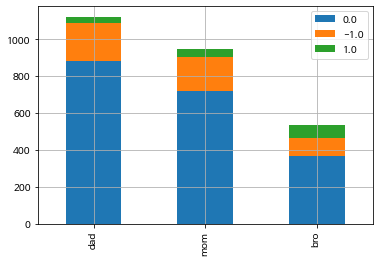

In [ ]:
bar_chart('협심증또는심근경색증')

아버지 > 어머니 > 형재자매

##뇌졸중 상관관계
환자의 혈액 상태, 당뇨 여부, 심장, 신장

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_STRfh1']==1][feature].value_counts()
    mom = df[df['HE_STRfh2']==1][feature].value_counts()
    bro = df[df['HE_STRfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

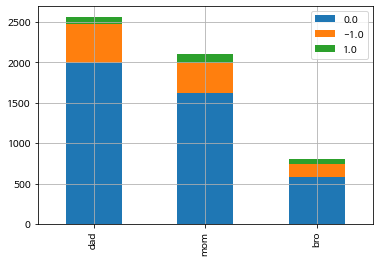

In [ ]:
bar_chart('뇌졸중')

##당뇨병 상관관계 알아보기

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    dad = df[df['HE_DMfh1']==1][feature].value_counts()
    mom = df[df['HE_DMfh2']==1][feature].value_counts()
    bro = df[df['HE_DMfh3']==1][feature].value_counts()
    
    data = pd.DataFrame([dad, mom, bro])
    data.index = ['dad', 'mom', 'bro']
    data.plot(kind='bar',stacked=True)

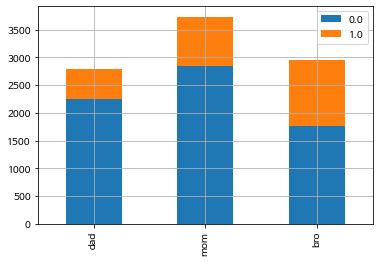

In [ ]:
bar_chart('당뇨병')

어머니 > 형재자매 > 아버지

가족력이 있는 사람과 가족력이 없는 사람 중에서 자신이 그 병에 걸린 확률

##소득분위와 자살률의 관계

##비만과 당뇨병, 당뇨, 중성지방량 등 관계 알아보기

In [ ]:
df.groupby('N_INTK').mean()  #식품섭취량

,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
N_INTK,,,,,,,,,,,,,,,,,,,,,
8.193333,2016.0,16.0,2.0,2.0,73.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16.200000,2011.0,14.0,1.0,1.0,50.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
21.408896,2019.0,17.0,1.0,2.0,55.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31.474527,2011.0,1.0,1.0,2.0,30.0,2.0,3.0,3.0,3.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
32.982011,2018.0,1.0,1.0,2.0,43.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779.962265,2018.0,6.0,1.0,1.0,46.0,3.0,3.0,3.0,4.0,4.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9629.541567,2013.0,14.0,1.0,1.0,36.0,4.0,4.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9697.199058,2015.0,5.0,1.0,1.0,54.0,4.0,4.0,5.0,5.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
